# Introduction
This notebook aim to improve efficiency and reduce overfitting of Breast Cancer classification by Simple Data Augmentation and Compact CNN Architecture.

# About the Dataset and Method
Each image filename stores information about the image itself: method of procedure biopsy, tumor class, tumor type, patient identification, and magnification factor. For example, SOB_B_TA-14-4659-40-001.png is the image 1, at magnification factor **40X**, of a benign tumor of type tubular adenoma, original from the slide 14-4659, which was collected by procedure SOB.

Using Tensorflow

# Helper

In [2]:
!pip install tensorflow
# !pip install -q -U tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
model_handle_map = {
    "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/1",
    "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/1",
    "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/1",
    "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/1",
    "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/1",
    "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/1",
    "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/1",
    "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/1",
    "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/1",
    "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
    "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/1",
    "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/1",
    "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/1",
    "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
    "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
    "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
    "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
    "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
    "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
    "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
    "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
    "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
    "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4",
    "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
    "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
    "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
    "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
    "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",
    "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5",
    "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
    "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
    "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
    "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
    "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
    "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
    "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
    "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
    "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
    "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
    "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}


model_image_size_map = {
    "efficientnetv2-s": 384,
    "efficientnetv2-m": 480,
    "efficientnetv2-l": 480,
    "efficientnetv2-s-21k": 384,
    "efficientnetv2-m-21k": 480,
    "efficientnetv2-l-21k": 480,
    "efficientnetv2-s-21k-ft1k": 384,
    "efficientnetv2-m-21k-ft1k": 480,
    "efficientnetv2-l-21k-ft1k": 480,
    "efficientnetv2-b0": 224,
    "efficientnetv2-b1": 240,
    "efficientnetv2-b2": 260,
    "efficientnetv2-b3": 300,
    "efficientnet_b0": 224,
    "efficientnet_b1": 240,
    "efficientnet_b2": 260,
    "efficientnet_b3": 300,
    "efficientnet_b4": 380,
    "efficientnet_b5": 456,
    "efficientnet_b6": 528,
    "efficientnet_b7": 600,
    "inception_v3": 299,
    "inception_resnet_v2": 299,
    "nasnet_large": 331,
    "pnasnet_large": 331,
}

In [4]:
kaggle_path = '../input/breakhis/'
img_path = 'BreaKHis_v1/'

Support function

In [30]:
def plot_count_data(col_name):
    df = pd.DataFrame(data, columns=[col_name])

    # Count the occurrences of each label
    label_counts = df[col_name].value_counts()

    # Plot the counts
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=['cyan', 'violet'])
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title('Counts of '+ col_name +' in the samples')
    plt.xticks([0, 1], label_counts.index)
    plt.show()

    print(label_counts)

def view_image():
    pass

def build_compact_network(image_size):
    print('building model...')
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(image_size, image_size, 3)),
        hub.KerasLayer(model_handle, trainable=True, name='base_model'),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid', name='classifier') 
    ],name=model_name)
    model.build((None, image_size, image_size, 3))
    model.summary()
    print('model loaded!!!')
    return model

def decode_test(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224, 224])/255
    return img

# Init Notebook

In [6]:
import sys
print(sys.version)

3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]


## Import library

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
# from tensorflow.keras.models import model
from tensorflow.keras.layers import Input
# import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import albumentations as A
from functools import partial
from sklearn.model_selection import train_test_split
import seaborn as sns
import scikitplot as skplt

## Load data

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
data = pd.read_csv('../input/breakhis/Folds.csv')
img_dir = '../input/breakhis/BreaKHis_v1/'
class_names = ['benign', 'malignant']

#load from CSV File
data = data.rename(columns={'filename':'path'})
data['label'] = data.path.apply(lambda x: x.split('/')[3])
data['label_int'] = data.label.apply(lambda x: class_names.index(x))
data['filename'] = data.path.apply(lambda x: x.split('/')[-1])
data.head(3)
#path = data.filename.apply(lambda x: x.split('/')[3])

,fold,mag,grp,path,label,label_int,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-001.png
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-002.png
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,benign,0,SOB_B_A-14-22549AB-100-003.png


# Visualize Dataset

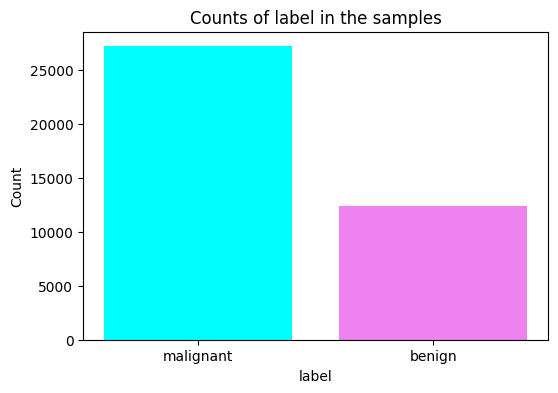

label
malignant    27145
benign       12400
Name: count, dtype: int64


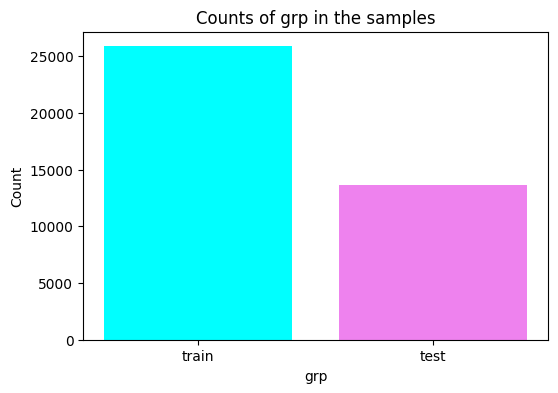

grp
train    25880
test     13665
Name: count, dtype: int64


In [9]:
plot_count_data('label')

plot_count_data('grp')

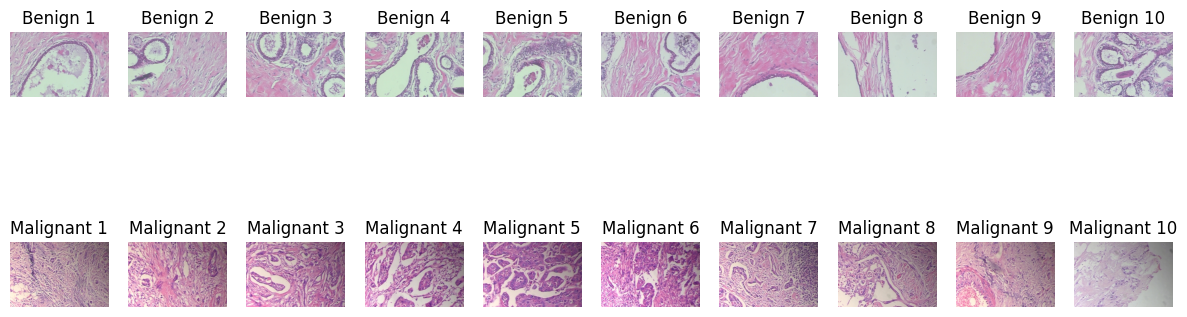

In [10]:
benign_paths = data[data['label'] == 'benign']['path'][:10]
malignant_paths = data[data['label'] == 'malignant']['path'][:10]


fig, axs = plt.subplots(2, 10, figsize=(15, 5))
for i, path in enumerate(benign_paths):
    img = plt.imread(kaggle_path + img_path + path)
    axs[0, i].imshow(img)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Benign {i+1}')

for i, path in enumerate(malignant_paths):
    img = plt.imread(kaggle_path + img_path + path)
    axs[1, i].imshow(img)
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Malignant {i+1}')

plt.show()

From non-professional biologist like me Benign looks like Rib Eyes and Malignant looks like Chuck Steak 😂

# Preprocess Data

In [11]:
model_name = 'efficientnetv2-b0'
model_handle = model_handle_map.get(model_name)
IMAGE_SIZE = model_image_size_map.get(model_name, 224)
BATCH_SIZE = 64
EPOCHS = 12

print(f"Selected model: {model_name} : {model_handle}")
print(f"Input size {IMAGE_SIZE}")

Selected model: efficientnetv2-b0 : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2
Input size 224


## 1) Train and Val df splitting:
Split Train and Validation set to 80% and 20% of original Traing set accordingly

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Training set
label
malignant    21485
benign        9671
Name: count, dtype: int64

Validation set
label
malignant    5360
benign       2429
Name: count, dtype: int64

Test set
label
benign       300
malignant    300
Name: count, dtype: int64


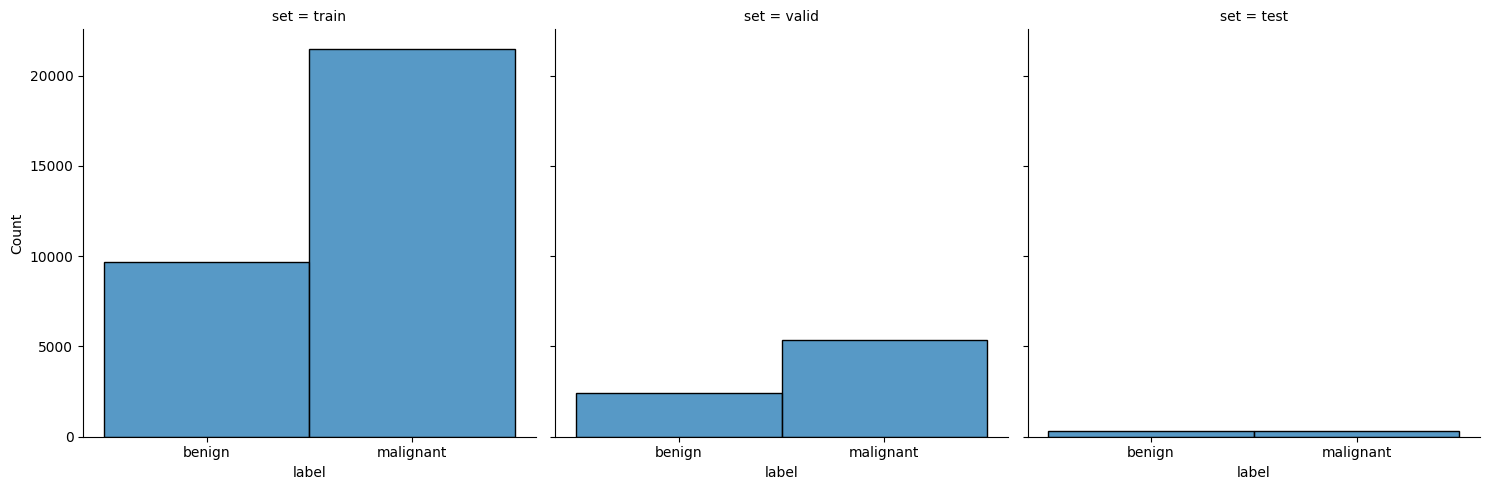

In [20]:
# remove 600 from dataset for testing
df_test = data.groupby('label').sample(n=300)
df_train = data.drop(df_test.index).reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# split training and validation set
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index).reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

df_test['set'] = 'test'
df_train['set'] = 'train'
df_val['set'] = 'valid'
data_new = pd.concat([df_train,df_val, df_test])

ax = sns.displot(data=data_new, x='label', col='set')

SAMPLE_SIZE = len(df_train)

print('Training set')
print(df_train.label.value_counts())

print('\nValidation set')
print(df_val.label.value_counts())

print('\nTest set')
print(df_test.label.value_counts())

## 2) Data Augmentation on Traing set

In [21]:
def parse_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img, label

def aug_fn(image): 
    transforms = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(p=0.5, limit=15),
        A.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.1, 0.1), brightness_by_max=True),
        A.RandomResizedCrop(p=0.8, height=IMAGE_SIZE, width=IMAGE_SIZE, scale=(0.9, 1.1), ratio=(0.05, 1.1), interpolation=0),
        A.Blur(p=0.3, blur_limit=(1, 1)),
    ])
    data = {"image":image}
    aug_data = transforms(**data)
    aug_img = aug_data["image"]
    aug_img = tf.cast(aug_img, tf.float32)
    aug_img = tf.image.resize(aug_img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return aug_img

def augmentor(image, label):
    aug_img = tf.numpy_function(func=aug_fn, inp=[image], Tout=tf.float32)
    return aug_img, label

## Load Dataset After Augmentation

In [22]:
def resize_rescale(image, label):
    img = tf.cast(image, tf.float32)
    img = tf.image.resize(img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return img, label

train_loader = tf.data.Dataset.from_tensor_slices((img_dir+df_train.path, df_train.label_int))
valid_loader = tf.data.Dataset.from_tensor_slices((img_dir+df_val.path, df_val.label_int))

train_ds = (
    train_loader.shuffle(len(df_train))
    .map(parse_image, num_parallel_calls=AUTOTUNE)
    .map(partial(augmentor),num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE) 
)
valid_ds = (
    valid_loader.shuffle(len(df_val))
    .map(parse_image, num_parallel_calls=AUTOTUNE)
    .map(resize_rescale, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

# Define (Compact?) Model

In [23]:
tf.keras.backend.clear_session()

print('building model...')
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    hub.KerasLayer(model_handle, trainable=True, name='base_model'),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid', name='classifier') 
],name=model_name)
model.build((None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()
print('model loaded!!!')

building model...
Model: "efficientnetv2-b0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_model (KerasLayer)     (None, 1280)              5919312   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)              

# Training

## Define Learning Rate Model

In [24]:
def custom_lr_schedule(epoch, initial_lr=2e-1, maximal_lr=7e-3, step_size=3):
    cycle = 1 + epoch // (2 * step_size)
    x = abs(epoch / step_size - 2 * cycle + 1)
    lr = initial_lr + (maximal_lr - initial_lr) * max(0, 1 - x)
    return lr

initial_learning_rate = 2e-1
maximal_learning_rate = 7e-3
step_size = 3 * (SAMPLE_SIZE // BATCH_SIZE)

In [25]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
]
# Default optimizer
# clr_scheduler = tfa.optimizers.CyclicalLearningRate( 
#     initial_learning_rate=2e-1,  maximal_learning_rate=7e-3, 
#     step_size=3*(SAMPLE_SIZE//BATCH_SIZE),  
#     scale_fn=lambda x: 1 / (2.0 ** (x - 1)), 
#     scale_mode='cycle'
# )

# model.compile(
#     optimizer=tf.keras.optimizers.SGD(learning_rate=clr_scheduler) , 
#     loss=tf.keras.losses.BinaryCrossentropy(), 
#     metrics=METRICS
# )

# Custom optimizer

learningrate_cb = tf.keras.callbacks.LearningRateScheduler(custom_lr_schedule)

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=initial_learning_rate) , 
    loss=tf.keras.losses.BinaryCrossentropy(), 
    metrics=METRICS
)

history = model.fit(
    train_ds, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks = [checkpoint_cb, learningrate_cb],
#     callbacks = [checkpoint_cb],
    validation_data=valid_ds,
)


Epoch 1/12


I0000 00:00:1720707928.236373      93 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


487/487 [==============================] - ETA: 0s - loss: 0.2060 - accuracy: 0.9171 - precision: 0.9310 - recall: 0.9501

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


487/487 [==============================] - 336s 622ms/step - loss: 0.2060 - accuracy: 0.9171 - precision: 0.9310 - recall: 0.9501 - val_loss: 0.0641 - val_accuracy: 0.9780 - val_precision: 0.9834 - val_recall: 0.9847 - lr: 0.2000
Epoch 2/12
487/487 [==============================] - 283s 580ms/step - loss: 0.0785 - accuracy: 0.9709 - precision: 0.9764 - recall: 0.9816 - val_loss: 0.0822 - val_accuracy: 0.9709 - val_precision: 0.9977 - val_recall: 0.9599 - lr: 0.1357
Epoch 3/12
487/487 [==============================] - 284s 582ms/step - loss: 0.0387 - accuracy: 0.9864 - precision: 0.9891 - recall: 0.9911 - val_loss: 0.0059 - val_accuracy: 0.9991 - val_precision: 0.9993 - val_recall: 0.9994 - lr: 0.0499
Epoch 4/12
487/487 [==============================] - 284s 583ms/step - loss: 0.0296 - accuracy: 0.9894 - precision: 0.9922 - recall: 0.9925 - val_loss: 0.0048 - val_accuracy: 0.9991 - val_precision: 0.9993 - val_recall: 0.9994 - lr: 0.0070
Epoch 5/12
487/487 [===========================

View training history

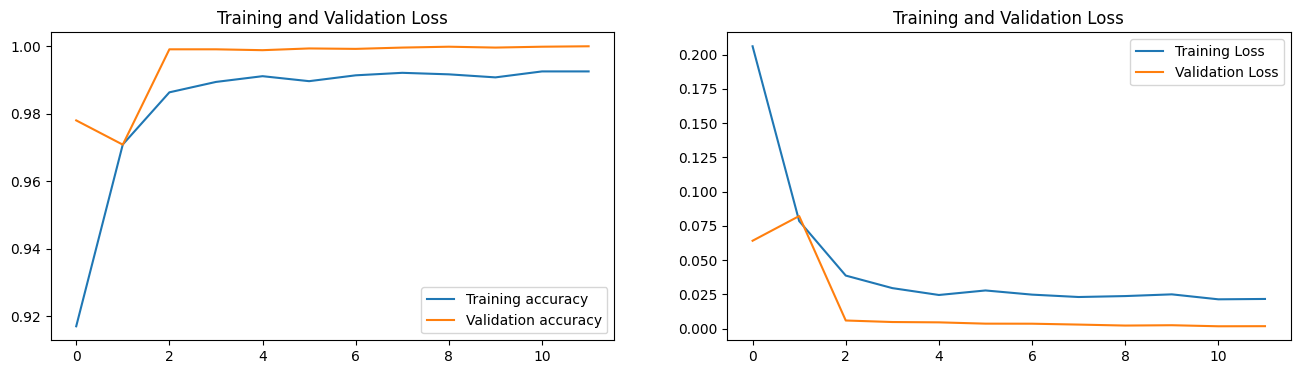

In [26]:
h = history.history

accuracy = h['accuracy']
val_accuracy = h['val_accuracy']

loss = h['loss']
val_loss = h['val_loss']

epochs_range = range(len(h['loss']))

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Evaluating

1/1 [==============================] - 2s 2s/step


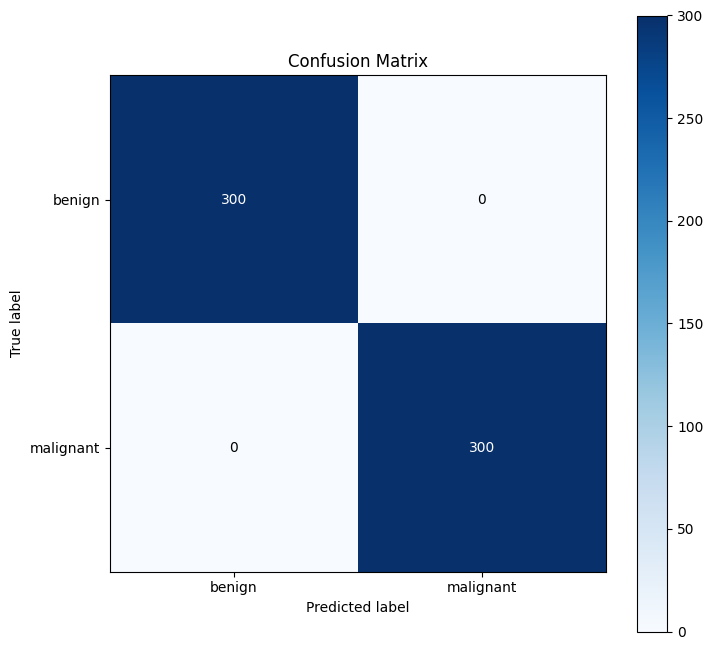

In [36]:

df_test = df_test.sample(frac=1).reset_index(drop=True)
test_ds = tf.data.Dataset.from_tensor_slices(img_dir+df_test.path) 
test_ds = test_ds.map(decode_test,num_parallel_calls=AUTOTUNE).batch(len(df_test))
test_img = next(iter(test_ds))
test_index = df_test.label_int.values
test_label = df_test.label.values

test_pred = model.predict(test_ds)
pred_index = np.round(test_pred).astype('uint8')
pred_label = np.array(class_names)[pred_index]

# print(classification_report(test_index, pred_index, target_names=class_names,zero_division=0))
# print('f1_score        :', f1_score(test_index, pred_index, average='micro'))
# print('accuracy_score  :', accuracy_score(test_index, pred_index))

cm = skplt.metrics.plot_confusion_matrix(test_label, pred_label, figsize=(8, 8), normalize=False)

# Inferencing

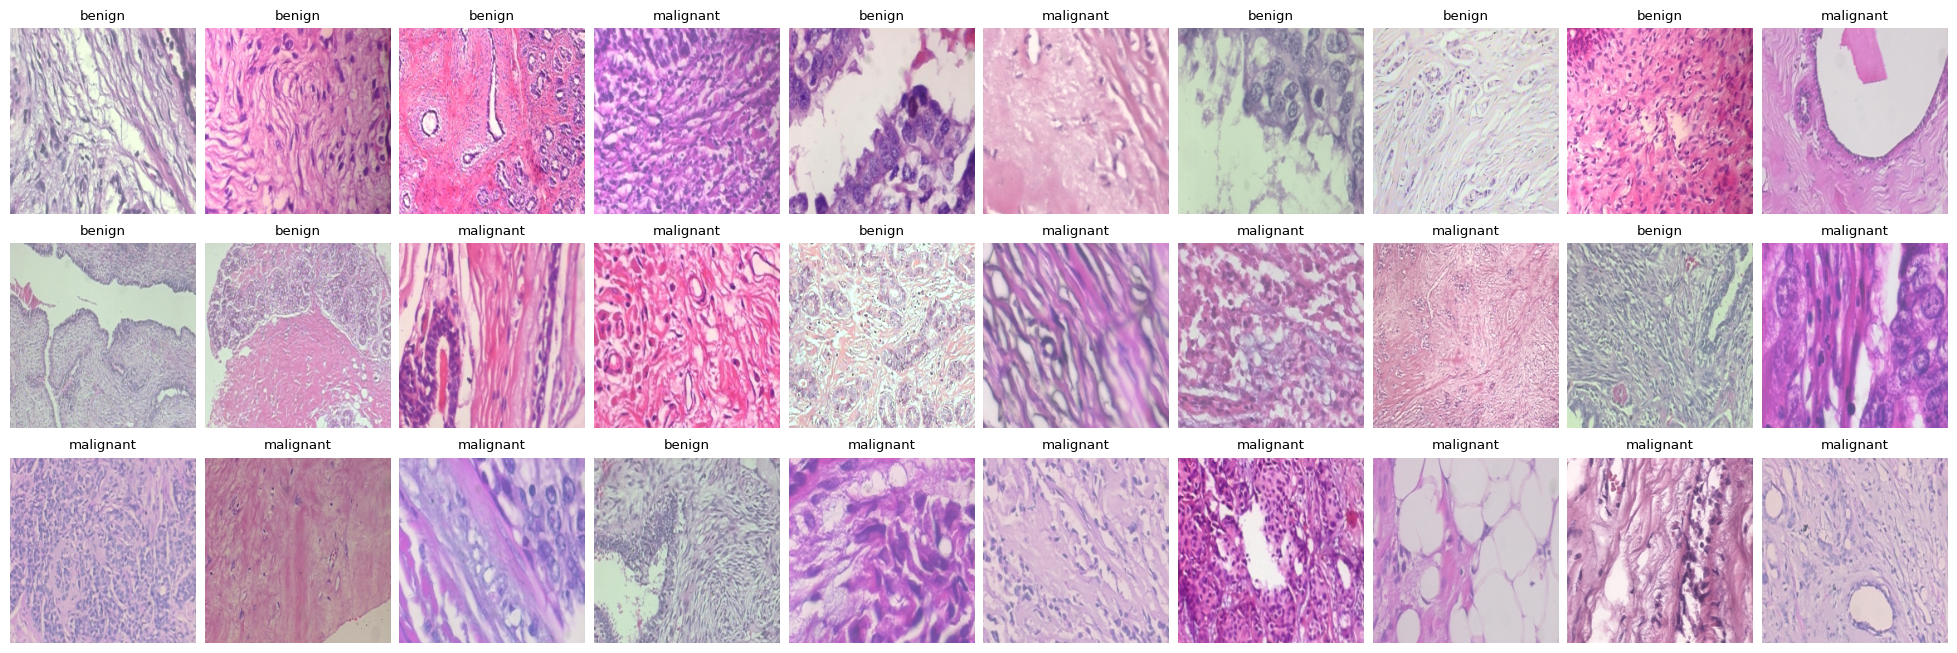

In [39]:
prediction_df = pd.DataFrame({'filename':df_test.filename.values,'actual':df_test.label.values, 'prediction': np.squeeze(pred_label),'path':df_test.path.values,})
wrong_df = prediction_df[prediction_df.actual != prediction_df.prediction].reset_index(drop=True)

#view first 30 prediction
plt.figure(figsize=(25,8))
plt.rcParams.update({'font.size': 8})
plt.subplots_adjust(wspace=0.05, hspace=0.15)
for i in range(30):
    ax = plt.subplot(3, 10, i + 1)
    shape = str(test_img[i].numpy().shape)
    plt.imshow(test_img[i].numpy())
    plt.title(pred_label[i][0])
    plt.axis("off") 
    plt.tight_layout